In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards
from tqdm import tqdm
from datasets import Dataset, concatenate_datasets

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-14 13:08:29,671] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/trl/trainer/ppo_config.py:142: UserWarning: The `optimize_cuda_cache` argument will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [2]:
%load_ext autoreload
%autoreload 2

In [23]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
tlog = pd.read_json("../../active-rlhf/outputs/results/dynarmlogs/contrastivedistill/tiny_rm_conf_cdist_500_250_active3.jsonl", orient='records', lines=True, nrows=64000)
# tlog = pd.read_json("../../activereprod/active-rlhf/outputs/results/dynarmlogs/math/u/prasanns/research/active-rlhf/outputs/models/math/tiny_rm_rand_subsamp_onlymathreprod3.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../outputs/results/dynarmlogs/.jsonl", orient='records', lines=True)
tmp = tlog
tmp = tmp.dropna(subset='golds')

In [24]:
tmp

,texts,rewards,golds,call
0,[Question: Darbepoetin is marketed by\n\nAnswe...,"[-0.0439453125, -0.1240234375]","[-0.09375000000000001, 0.0]","[1, 1]"
1,"[Question: It ran for six seasons, producing a...","[-0.0517578125, 0.1416015625]","[-0.0625, -0.1875]","[1, 1]"
2,[Question: A typical lightsaber is depicted as...,"[-0.625, 0.3828125]","[-0.234375, -0.25]","[1, 1]"
3,[Question: The title of Augustus was conferred...,"[-0.053466796875, -0.060791015625]","[-0.390625, -0.40625000000000006]","[1, 1]"
4,[Question: Woodsboro is a town in Refugio\n\nA...,"[-0.1142578125, -0.11083984375]","[-0.21875000000000003, -0.21875000000000003]","[1, 1]"
...,...,...,...,...
63995,[Question: The Palace of Fontainebleau (; )\n\...,"[3.03125, 3.453125]","[-0.0234375, -0.0234375]","[2479, 2479]"
63996,"[Question: Oakdale was founded as ""Dunnsville""...","[0.002777099609375, 3.125]","[0.0859375, 0.03125]","[2479, 2479]"
63997,"[Question: ""Seigneur"" is the French word for\n...","[3.109375, 2.90625]","[-0.125, -0.125]","[2479, 2479]"
63998,[Question: Some have remained on maps for cent...,"[0.00714111328125, 0.006011962890625001]","[0.1171875, 0.1171875]","[2479, 2479]"


In [25]:
rat = 0
ngs = []
accs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    # row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    if len(row['golds'])==0:
        continue
    if row['golds'][0]==row['golds'][1]:
            continue
    ngs.append(row['golds'])
    if ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
        accs.append(0)
    else:
        accs.append(1)
#tmp['golds'] = ngs
print(rat/len(ngs))

0.5005537098560354


In [26]:
tot, corr = 0, 0
vals = []
interv = 200
for j in range(0, len(accs), interv):
    vals.append(mean(accs[j:j+interv]))
    # # check heuristic accuracy
    # for i, row in tmp.iloc[j:j+interv].iterrows():
    #     # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
    #     if row['golds'][0]==row['golds'][1]:
    #         continue
    #     tot = tot+1
    #     corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    # vals.append(corr/tot)

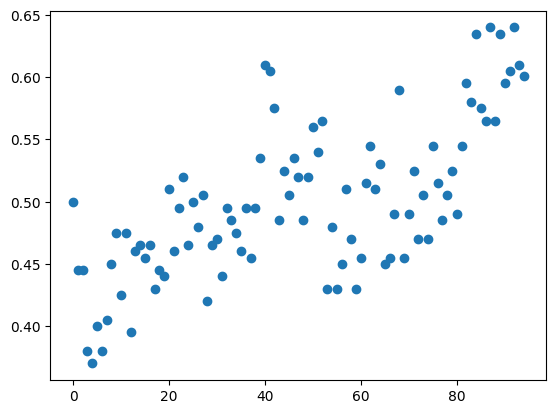

In [27]:
plt.scatter(range(len(vals)), vals)

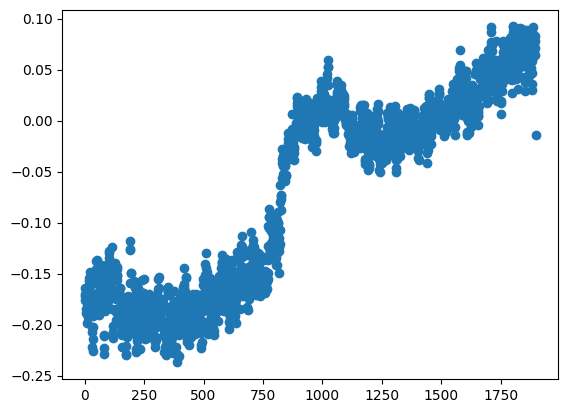

In [29]:
means = [mean(m) for m in ngs]
# means = [mean(m) for m in tmp['rewards']]

interv = 10
mbins = [mean(means[i:i+50]) for i in range(0, len(means), interv)]
plt.scatter(range(len(mbins)), mbins)

In [244]:
mean(means[-200:])

23.835

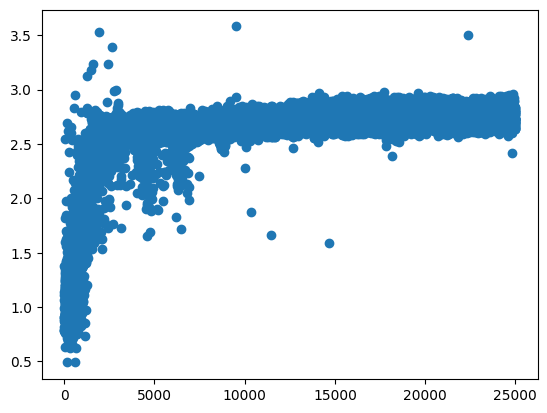

In [113]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)